# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import count

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda:0


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# Environments contain brains which are responsible for deciding the actions 
# of their associated agents. Here we check for the first brain available, 
# and set it as the default brain we will be controlling from Python

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [5]:
#initialize Agent
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

4. DDPG

Episode 10, Average Score: 0.81, Max: 0.73, Min: 0.73
Episode 20, Average Score: 1.02, Max: 1.05, Min: 1.05
Episode 30, Average Score: 0.92, Max: 0.35, Min: 0.35
Episode 40, Average Score: 0.89, Max: 0.68, Min: 0.68
Episode 50, Average Score: 0.90, Max: 0.66, Min: 0.66
Episode 60, Average Score: 0.89, Max: 0.09, Min: 0.09
Episode 70, Average Score: 0.91, Max: 0.64, Min: 0.64
Episode 80, Average Score: 0.94, Max: 0.04, Min: 0.04
Episode 90, Average Score: 0.95, Max: 1.15, Min: 1.15
Episode 100, Average Score: 0.97, Max: 1.34, Min: 1.34
Episode 110, Average Score: 1.02, Max: 2.48, Min: 2.48
Episode 120, Average Score: 1.05, Max: 1.09, Min: 1.09
Episode 130, Average Score: 1.12, Max: 0.78, Min: 0.78
Episode 140, Average Score: 1.16, Max: 1.95, Min: 1.95
Episode 150, Average Score: 1.24, Max: 0.94, Min: 0.94
Episode 160, Average Score: 1.34, Max: 1.24, Min: 1.24
Episode 170, Average Score: 1.46, Max: 3.48, Min: 3.48
Episode 180, Average Score: 1.59, Max: 2.10, Min: 2.10
Episode 190, Averag

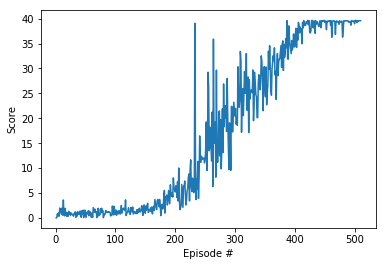

In [6]:
def ddpg(n_episodes=2000, max_t=2000):
    success = 0
    scores_deque = deque(maxlen=100)
    average_scores = []                                        # average of the score of the 20 agents for each episode
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state
        scores = np.zeros(num_agents)                          # initialize the score
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to environment
            next_states = env_info.vector_observations         # get next state
            rewards = env_info.rewards                         # get reward
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states                               # roll over states to next time step
            scores += rewards                                  # update the score          
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        score = np.mean(scores)
        scores_deque.append(score)
        average_scores.append(score)      
        
        # Every 10 episodes provide status
        if i_episode % 10 == 0:
            print('\rEpisode {}, Average Score: {:.2f}, Max: {:.2f}, Min: {:.2f}'\
                .format(i_episode, np.mean(scores_deque), np.max(scores), np.min(scores)), end="\n")  
            
        if np.mean(scores_deque) >= 30.0:
            # Set 1 if average is above 30
            success += 1
        else:
            # If average is below or drops below 30 reset success parameter
            success = 0
        
        # Finished after 100 consecutive episodes with an average above 30
        if success >= 100:
            torch.save(agent.actor_local.state_dict(), 'ddpg_network_actor_weight.pth')
            torch.save(agent.critic_local.state_dict(), 'ddpg_network_critic_weight.pth')
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))            
            break            
            
    return average_scores


scores = ddpg()

# Plot result
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()